In [1]:
#importing pandas and sklearn to look at the data and perform dataframe operations
import pandas as pd
import sklearn 

In [2]:
#importing numpy for performing various numerical operations
import numpy as np 

In [3]:
#importing matplotlib and seaborn for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load the training data
historical_df = pd.read_csv('train.csv', low_memory=False)
#creating a copy of the data for further analysis
df = historical_df.copy()

In [5]:
#Display the first few rows of the training data
print(df.head())


       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

In [6]:
print("The number of rows are {} and the number of columns are {}".format(df.shape[0],df.shape[1]))

The number of rows are 100000 and the number of columns are 28


In [7]:
#finding the data types and number of non-null values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
#finding key statistical values of the numerical columns
df.describe().T

count         mean          std         min  \
Monthly_Inhand_Salary      84998.0  4194.170850  3183.686167  303.645417   
Num_Bank_Accounts         100000.0    17.091280   117.404834   -1.000000   
Num_Credit_Card           100000.0    22.474430   129.057410    0.000000   
Interest_Rate             100000.0    72.466040   466.422621    1.000000   
Delay_from_due_date       100000.0    21.068780    14.860104   -5.000000   
Num_Credit_Inquiries       98035.0    27.754251   193.177339    0.000000   
Credit_Utilization_Ratio  100000.0    32.285173     5.116875   20.000000   
Total_EMI_per_month       100000.0  1403.118217  8306.041270    0.000000   

                                  25%          50%          75%           max  
Monthly_Inhand_Salary     1625.568229  3093.745000  5957.448333  15204.633333  
Num_Bank_Accounts            3.000000     6.000000     7.000000   1798.000000  
Num_Credit_Card              4.000000     5.000000     7.000000   1499.000000  
Interest_Rate                8.000000    13.000000    20.000000   5797.000000  
Delay_from_due_date         10.000000    18.000000    28.000000     67.000000  
Num_Credit_Inquiries         3.000000     6.000000     9.000000   2597.000000  
Credit_Utilization_Ratio    28.052567    32.305784    36.496663     50.000000  
Total_EMI_per_month         30.306660    69.249473   161.224249  82331.000000

In [9]:
#finding the key statistical values of the categorical columns
df.describe(exclude=np.number).T

count  unique                               top  \
ID                       100000  100000                            0x1602   
Customer_ID              100000   12500                         CUS_0xd40   
Month                    100000       8                           January   
Name                      90015   10139                            Langep   
Age                      100000    1788                                38   
SSN                      100000   12501                         #F%$D@*&8   
Occupation               100000      16                           _______   
Annual_Income            100000   18940                          36585.12   
Num_of_Loan              100000     434                                 3   
Type_of_Loan              88592    6260                     Not Specified   
Num_of_Delayed_Payment    92998     749                                19   
Changed_Credit_Limit     100000    4384                                 _   
Credit_Mix               100000       4                          Standard   
Outstanding_Debt         100000   13178                           1360.45   
Credit_History_Age        90970     404            15 Years and 11 Months   
Payment_of_Min_Amount    100000       3                               Yes   
Amount_invested_monthly   95521   91049                         __10000__   
Payment_Behaviour        100000       7    Low_spent_Small_value_payments   
Monthly_Balance           98800   98792  __-333333333333333333333333333__   
Credit_Score             100000       3                          Standard   

                          freq  
ID                           1  
Customer_ID                  8  
Month                    12500  
Name                        44  
Age                       2833  
SSN                       5572  
Occupation                7062  
Annual_Income               16  
Num_of_Loan              14386  
Type_of_Loan              1408  
Num_of_Delayed_Payment    5327  
Changed_Credit_Limit      2091  
Credit_Mix               36479  
Outstanding_Debt            24  
Credit_History_Age         446  
Payment_of_Min_Amount    52326  
Amount_invested_monthly   4305  
Payment_Behaviour        25513  
Monthly_Balance              9  
Credit_Score             53174

In [10]:
df.Month.value_counts()

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

In [11]:
#finding the unique values for each column in the data to find unwanted values
#first creating a copy of the data that do not have missing values
df_without_na = df.dropna().copy()

In [12]:
#finding the unique values for each column
for i in df_without_na:
    print('\n', i, df_without_na[i].unique())


 ID ['0x1602' '0x1608' '0x160e' ... '0x25fea' '0x25feb' '0x25fed']

 Customer_ID ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']

 Month ['January' 'July' 'February' 'March' 'May' 'June' 'August' 'April']

 Name ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

 Age ['23' '28_' '28' ... '8425' '2263' '1342']

 SSN ['821-00-0265' '004-07-5839' '486-85-3974' ... '133-16-7738' '031-35-0942'
 '078-73-5990']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Mechanic' 'Writer'
 'Accountant' 'Architect' 'Musician' 'Developer']

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Monthly_Inhand_Salary [ 1824.84333333  3037.98666667 12187.22       ...  3097.00833333
  1929.90666667  3359.41583333]

 Num_Bank_Accounts [   3    2    1    0    8    5    6    7    9   10    4   67  528 1647
 1696  649 

In [164]:
def preprocess_data(data, mvi_groupby=None, mvi_customval=None, column=None, unwanted_value_replace=None, unwanted_value_strip=None, datatype=None):
    if column:
        # Initial state of the column
        print(f"Initial data for column '{column}':\n",data[column].head())
    # stripping unwanted values that might be at the beginning or end of the value
    if unwanted_value_strip is not None:
        if data[column].dtype == object:
            data[column] = data[column].str.strip(unwanted_value_strip)
            print(f"\nTrailing & leading {unwanted_value_strip} are removed from column '{column}'.\n",data[column].head())
    # replacing unwanted value with NaN
    if unwanted_value_replace is not None:
        data[column] = data[column].replace(unwanted_value_replace, np.nan)
        print(f"\nUnwanted value {unwanted_value_replace} is replaced with NaN in column '{column}'.\n",data[column].head())
    # performing missing value imputation (mvi) using mode after grouping data using the column specified by the user.
    if mvi_groupby and column:
        # Fill missing values with the mode of each group
        def fill_group_mode(series):
            if series.isnull().all():
                return series.fillna(0)
            mode = series.mode()
            return series.fillna(mode[0] if not mode.empty else 0)
        data[column] = data.groupby(mvi_groupby)[column].transform(fill_group_mode)
        data[column] = data[column].fillna(fill_group_mode)
        print(f"\nAfter MVI, column '{column}':\n",data[column].head())
    # performing missing value imputation using a user provided custom value
    if mvi_customval is not None:
         data[column] = data[column].replace([np.nan], mvi_customval)
         print(f"\nMissing values are replaced with '{mvi_customval}'")
         print(data)
    # changing the data type of the column based on user provided data type
    if datatype is not None:
        # First, handle conversion to numeric with coercion
            if datatype in ['int', 'float']:
                data[column] = pd.to_numeric(data[column], errors='coerce')
                
                # Fill NaNs with a default value before converting to int if needed
                if datatype == 'int':
                    data[column] = data[column].fillna(0).astype(int)
            else:
                # Direct conversion for other data types
                try:
                    data[column] = data[column].astype(datatype)
                except ValueError as e:
                    print(f"Could not convert column '{column}' to {datatype}: {e}")

            print(f"\nData type of '{column}' changed to {datatype}.\n", data[column].head())
    print('--------------------------------------------------')

In [110]:
# performing MVI on the categorical columns
print("Column: Name")
preprocess_data(data=df, column='Name', mvi_groupby='Customer_ID')
print("Column: Type_of_Loan")
preprocess_data(data=df,column='Type_of_Loan', mvi_customval='Not specified')


Column: Name

Missing values imputed with group mode
--------------------------------------------------
Column: Type_of_Loan

Missing values are replaced with 'Not specified'
            ID Customer_ID     Month           Name  Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23  821-00-0265   
...        ...         ...       ...            ...  ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25  078-73-5990   
99999  0x25fed  CUS_0x

In [111]:
# performing MVI on numerical columns
print("Column: Monthly_Inhand_Salary")
preprocess_data(data=df,column='Monthly_Inhand_Salary',mvi_groupby='Customer_ID')
print("Column:Num_Credit_Inquiries")
preprocess_data(data=df,column='Num_Credit_Inquiries',mvi_groupby='Customer_ID')

Column: Monthly_Inhand_Salary

Missing values imputed with group mode
--------------------------------------------------
Column:Num_Credit_Inquiries

Missing values imputed with group mode
--------------------------------------------------


In [112]:
# stripping unwanted values, performing MVI and typecasting
print("Column: Age")
preprocess_data(data=df,column='Age',unwanted_value_strip='_',mvi_groupby='Customer_ID',datatype='int')
print("Column: Annual_Income")
preprocess_data(data=df,column='Annual_Income',unwanted_value_strip='_',mvi_groupby='Customer_ID',datatype='float')
print("Column: Outstanding_Debt")
preprocess_data(data=df,column='Outstanding_Debt',unwanted_value_strip='_',mvi_groupby='Customer_ID',datatype='float')
print("Column: Amount_invested_monthly")
preprocess_data(data=df,column='Amount_invested_monthly',unwanted_value_strip='_',mvi_groupby='Customer_ID',datatype='float')
print("Column: Num_of_Loan")
preprocess_data(data=df,column='Num_of_Loan',unwanted_value_strip='_',mvi_groupby='Customer_ID',datatype='int')
print("Column: Num_of_Delayed_Payment")
preprocess_data(data=df,column='Num_of_Delayed_Payment',unwanted_value_strip='_',mvi_groupby='Customer_ID',datatype='float')

Column: Age

Missing values imputed with group mode

Datatype of Age is changed to int
--------------------------------------------------
Column: Annual_Income

Missing values imputed with group mode

Datatype of Annual_Income is changed to float
--------------------------------------------------
Column: Outstanding_Debt

Missing values imputed with group mode

Datatype of Outstanding_Debt is changed to float
--------------------------------------------------
Column: Amount_invested_monthly

Missing values imputed with group mode

Datatype of Amount_invested_monthly is changed to float
--------------------------------------------------
Column: Num_of_Loan

Missing values imputed with group mode

Datatype of Num_of_Loan is changed to int
--------------------------------------------------
Column: Num_of_Delayed_Payment

Missing values imputed with group mode

Datatype of Num_of_Delayed_Payment is changed to float
--------------------------------------------------


In [113]:
# replacing unwanted values to NaN, performing MVI and typecasting
print("Column: Changed_Credit_Limit")
preprocess_data(data=df,column='Changed_Credit_Limit',unwanted_value_strip='_',unwanted_value_replace='',mvi_groupby='Customer_ID',datatype='float')
print("Column: Monthly_Balance")
preprocess_data(data=df,column='Monthly_Balance',unwanted_value_strip='_',unwanted_value_replace='__-333333333333333333333333333__',mvi_groupby='Customer_ID',datatype='float')

Column: Changed_Credit_Limit

Unwanted value  is replaced with NaN

Missing values imputed with group mode

Datatype of Changed_Credit_Limit is changed to float
--------------------------------------------------
Column: Monthly_Balance

Unwanted value __-333333333333333333333333333__ is replaced with NaN

Missing values imputed with group mode

Datatype of Monthly_Balance is changed to float
--------------------------------------------------


In [115]:
# Creating a function that picks the year and month and then combines them to give the total number of months
def credit_history_in_months(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        months = int(val.split(' ')[3])
        return (years*12)+months
    else:
        return val
     

In [116]:
# applying the function to the column
df['Credit_History_Age']=df['Credit_History_Age'].apply(lambda x:credit_history_in_months(x)).astype(float)

AttributeError: 'float' object has no attribute 'split'

In [118]:
print('Column: Credit_History_Age')
preprocess_data(data=df,column='Credit_History_Age',mvi_groupby='Customer_ID')

Column: Credit_History_Age

Missing values imputed with group mode
--------------------------------------------------


In [120]:
# A check to see if there are any missing values left
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [22]:
# A check to see if typecasting has been done correctly
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                           int64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [23]:
# A function to find and cap outliers using the IQR method
def outlier_capping(data,threshold=1.5):
    # Making a copy of the input dataframe
    data_copy=data.copy()
    # Creating an empty list to save the outlier indices
    outlier_indices=[]
    # Calculating quartile 1 and 3 for every numerical column in the data
    for column in data_copy.columns:
        if pd.api.types.is_numeric_dtype(data_copy[column]):
            Q1=data_copy[column].quantile(0.25)
            Q3=data_copy[column].quantile(0.75)
            # Calculating the IQR
            IQR=Q3-Q1
            # Defining the upper and lower outlier bounds
            lower_bound=Q1-threshold*IQR
            upper_bound=Q3+threshold*IQR
            # Identifying outliers
            outliers=data_copy[(data_copy[column]<lower_bound) | (data_copy[column]>upper_bound)]
            outlier_indices.extend(outliers.index)
            # Capping outliers
            data_copy[column]=np.where(data_copy[column]<lower_bound,lower_bound,data_copy[column])
            data_copy[column]=np.where(data_copy[column]>upper_bound,upper_bound,data_copy[column])
            # Removing duplicates from outlier_indices list
            outlier_indices=list(set(outlier_indices))
    # returning the dataframe with capped outliers
    return data_copy,outlier_indices

In [24]:
# Running the function to cap all the outliers in the data
df_clean,outliers=outlier_capping(df)

In [25]:
# Comparing the columns with and without the outliers
def outlier_capping_comparison(data,data_processed, outlier_indices):
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            plt.figure(figsize=(12,6))
            # plotting the numerical columns from the original dataframe
            plt.subplot(1,2,1)
            sns.boxplot(data=data[column])
            plt.title(f'Before outlier capping: {column}')
            # plot distribution of the numerical columns where outliers are capped
            plt.subplot(1,2,2)
            sns.boxplot(data=data_processed[column])
            plt.title(f'After outlier capping: {column}')
            # showing output
            plt.tight_layout()
            plt.show()

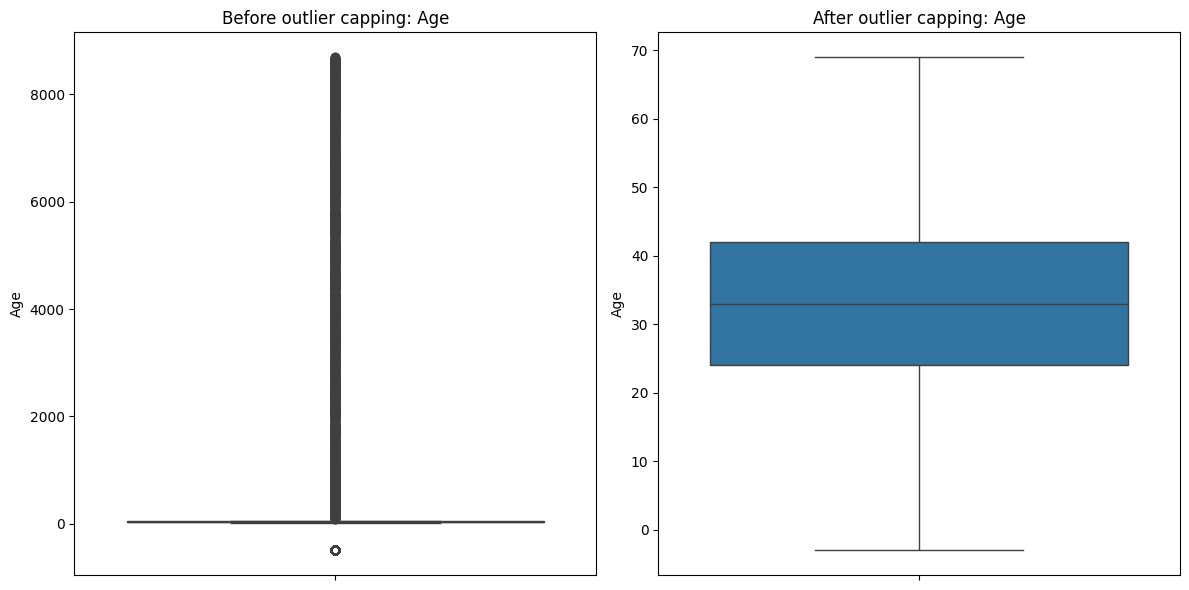

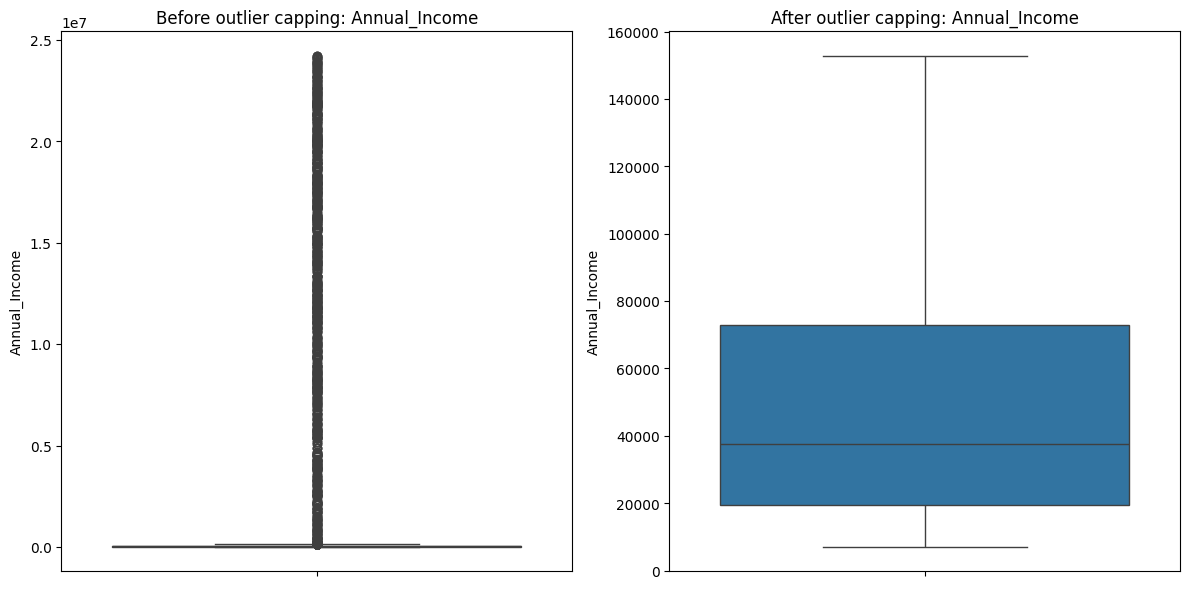

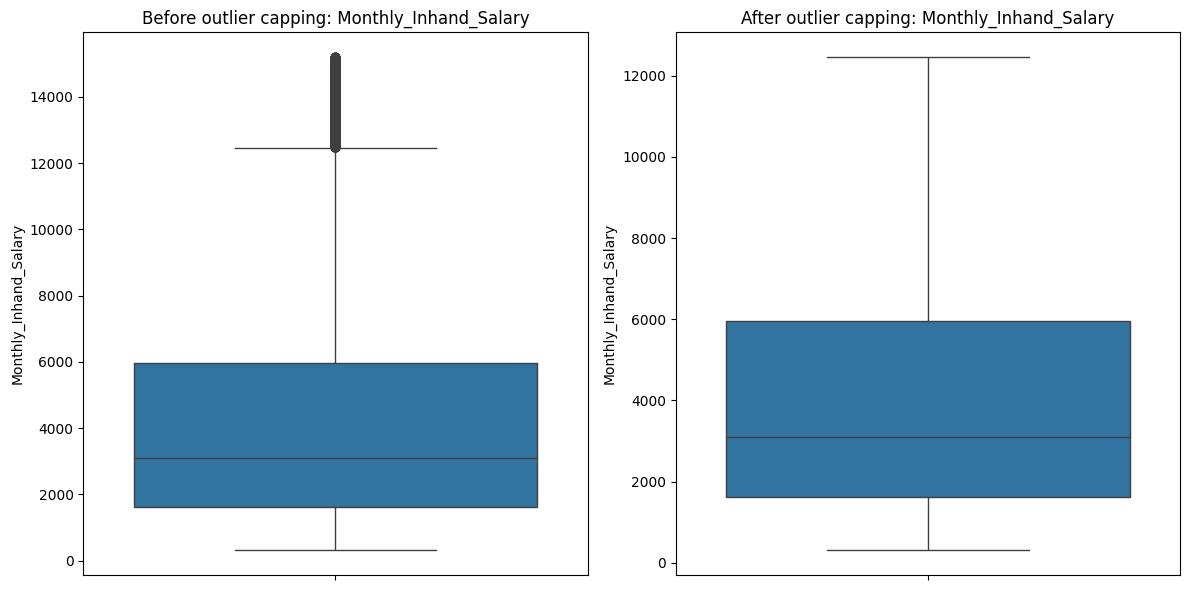

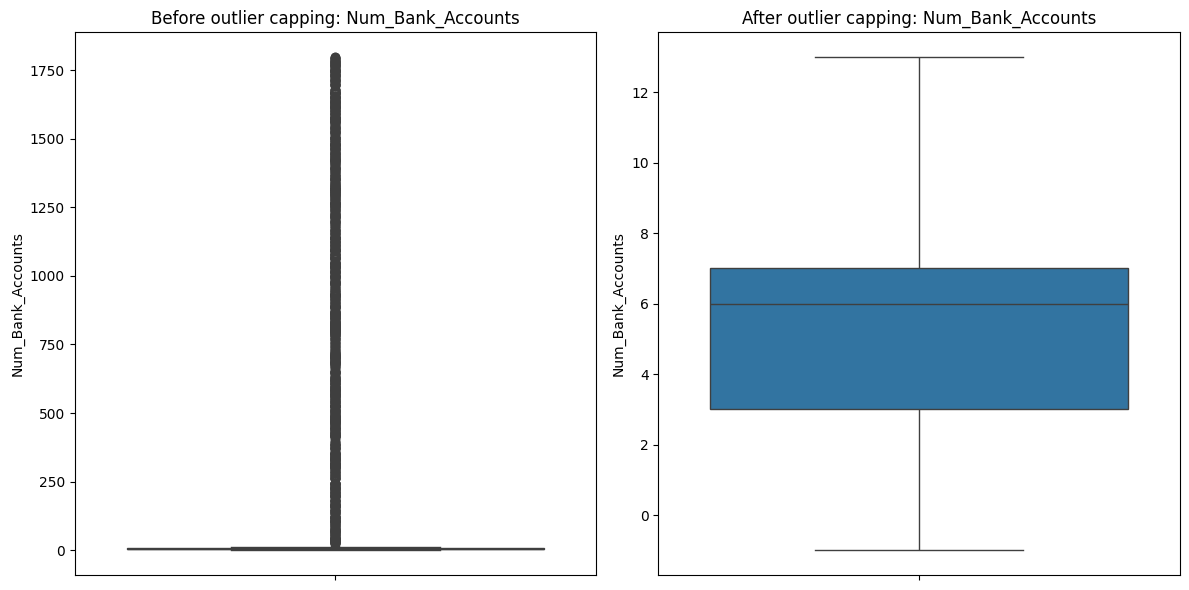

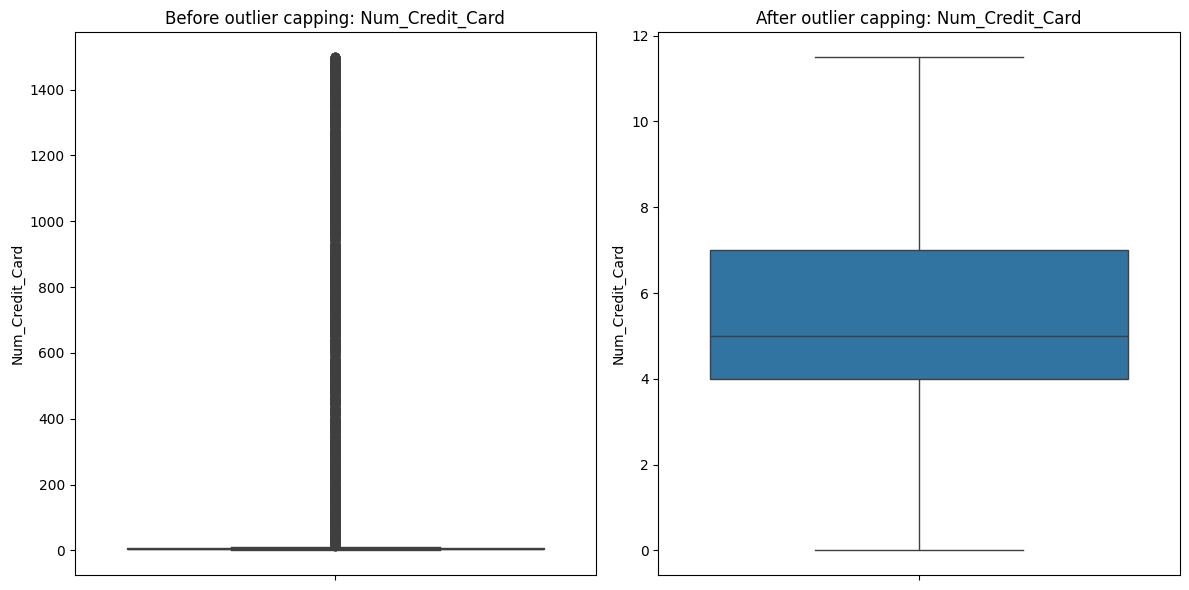

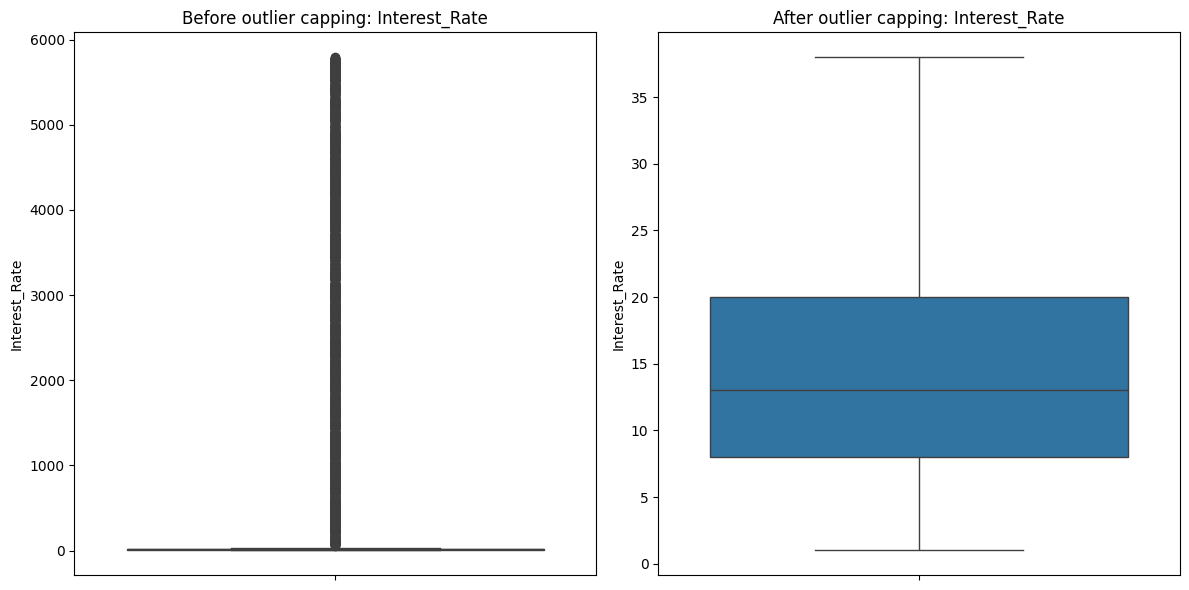

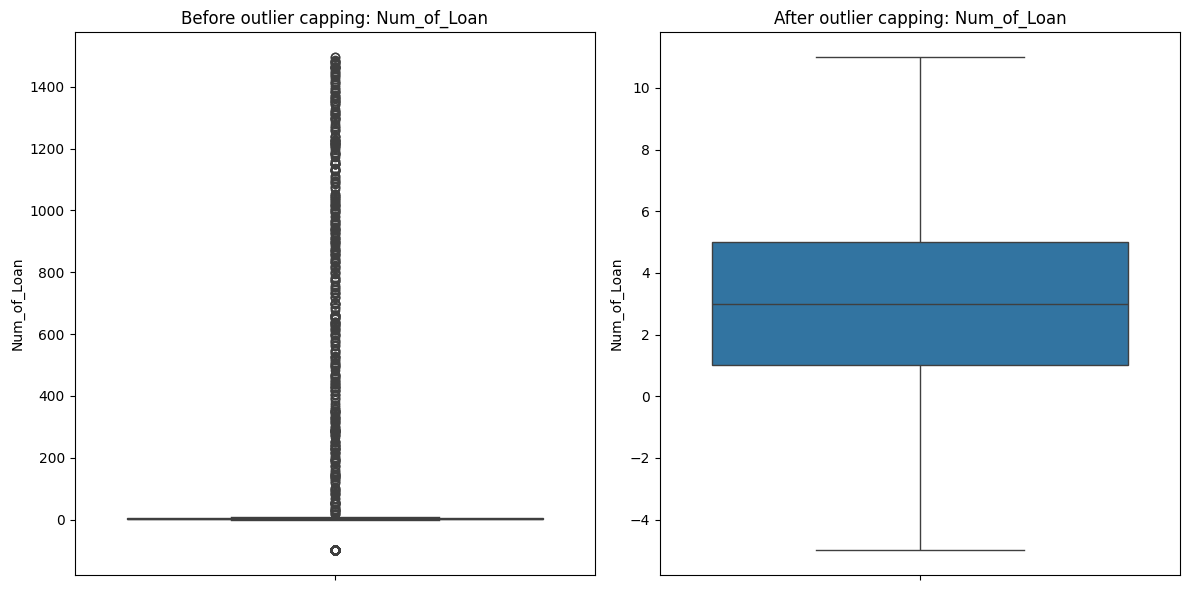

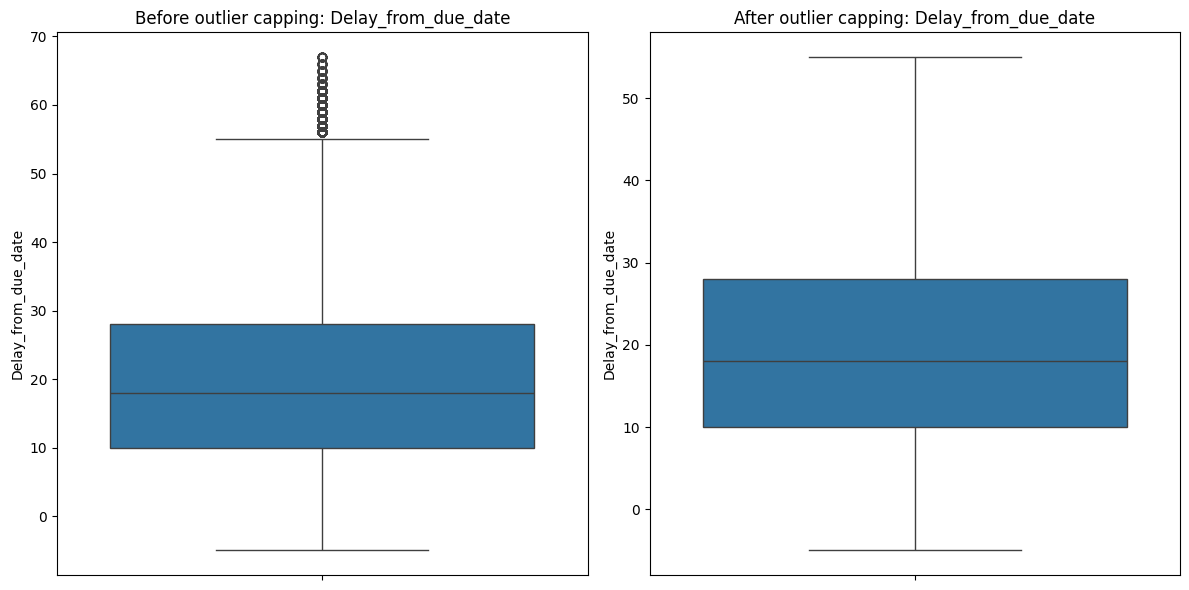

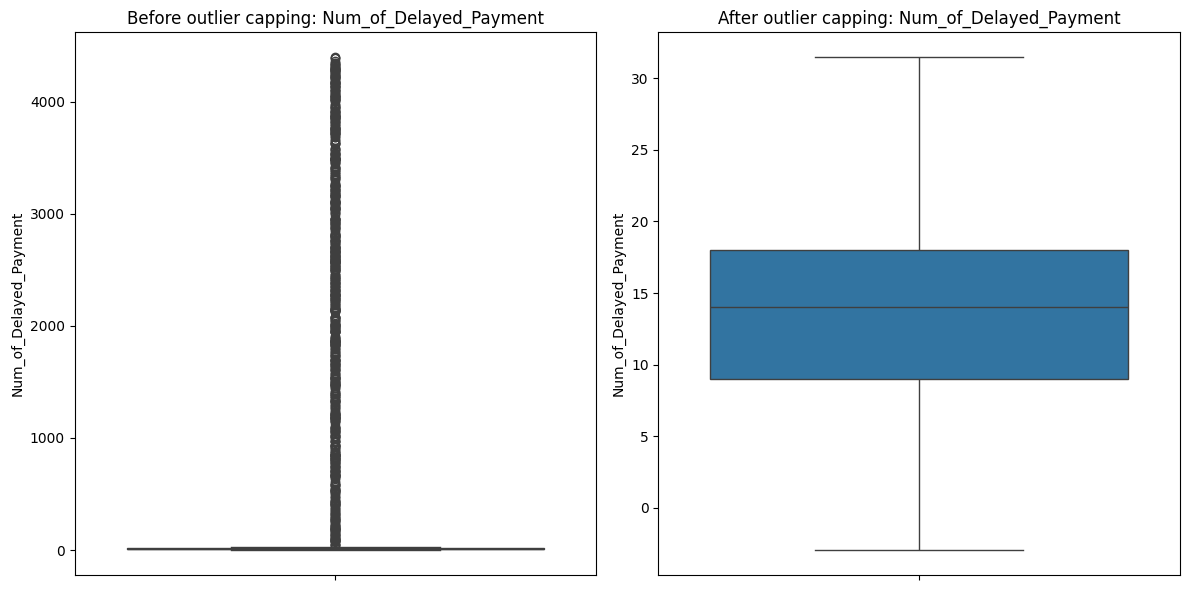

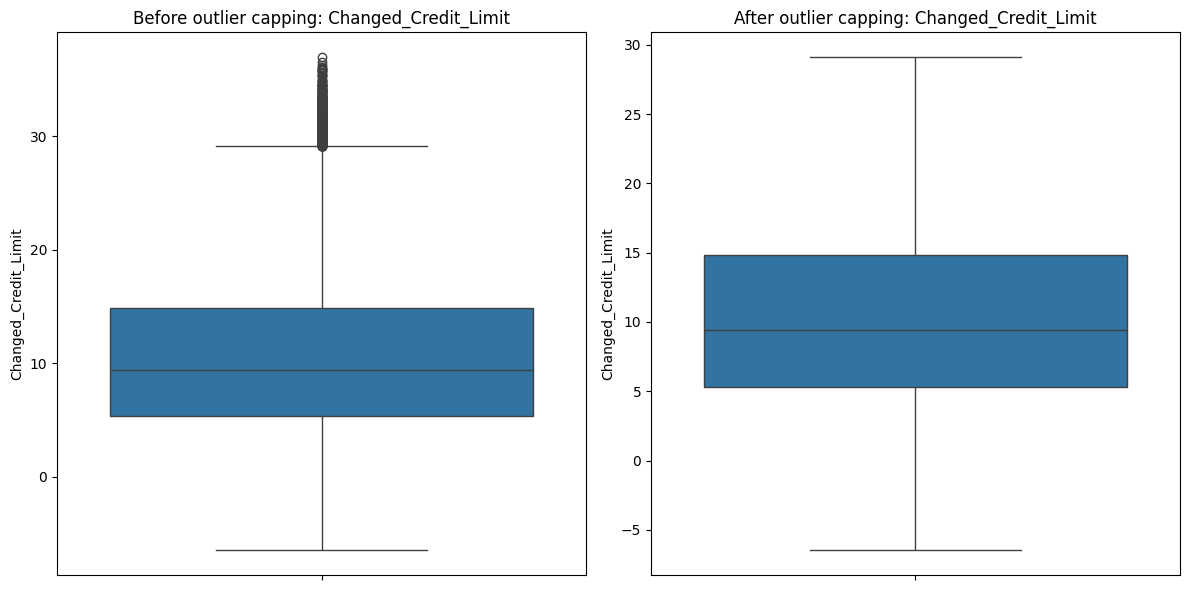

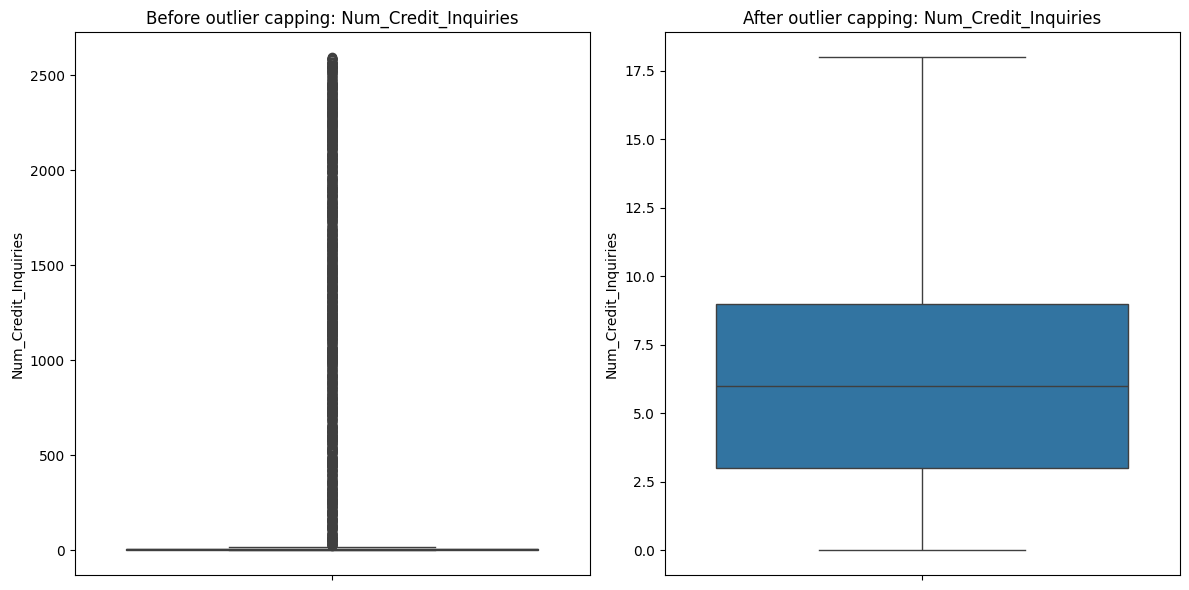

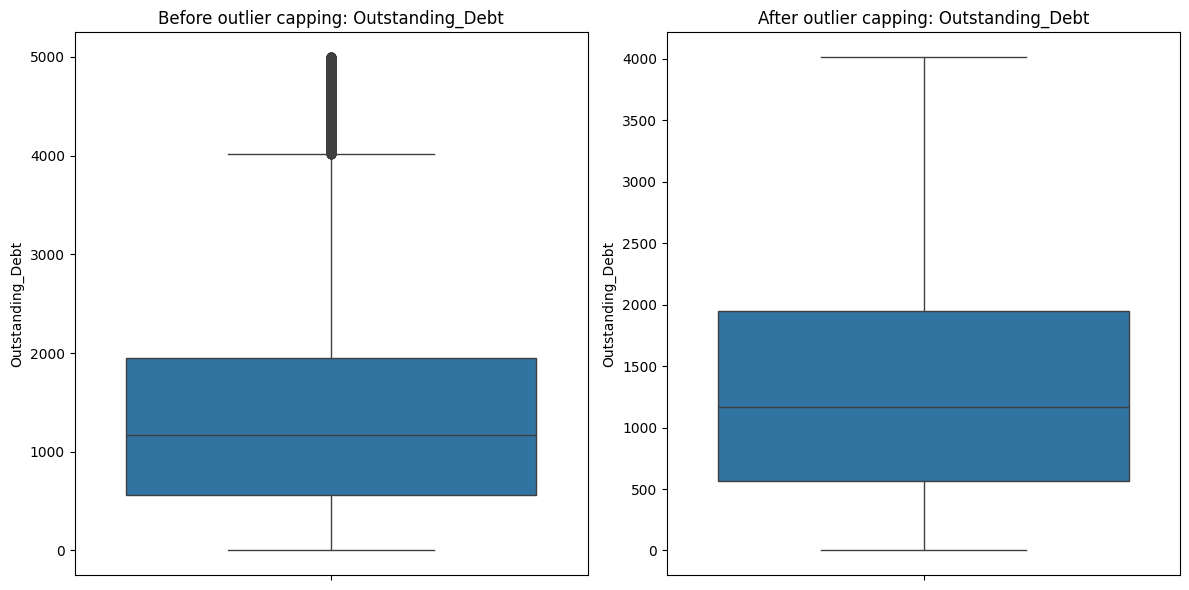

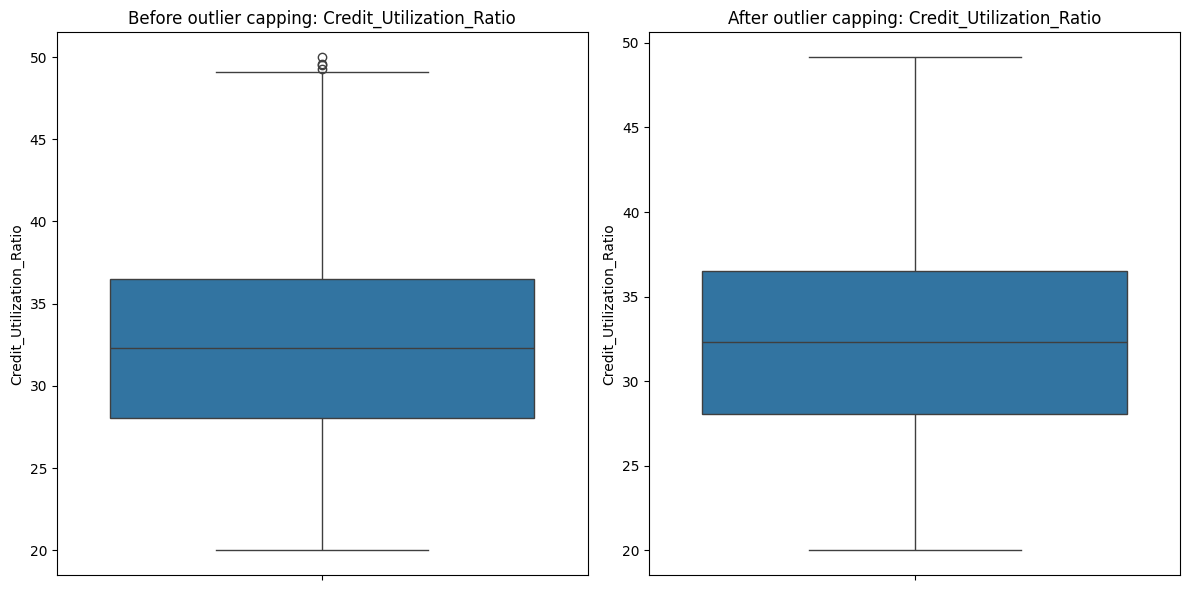

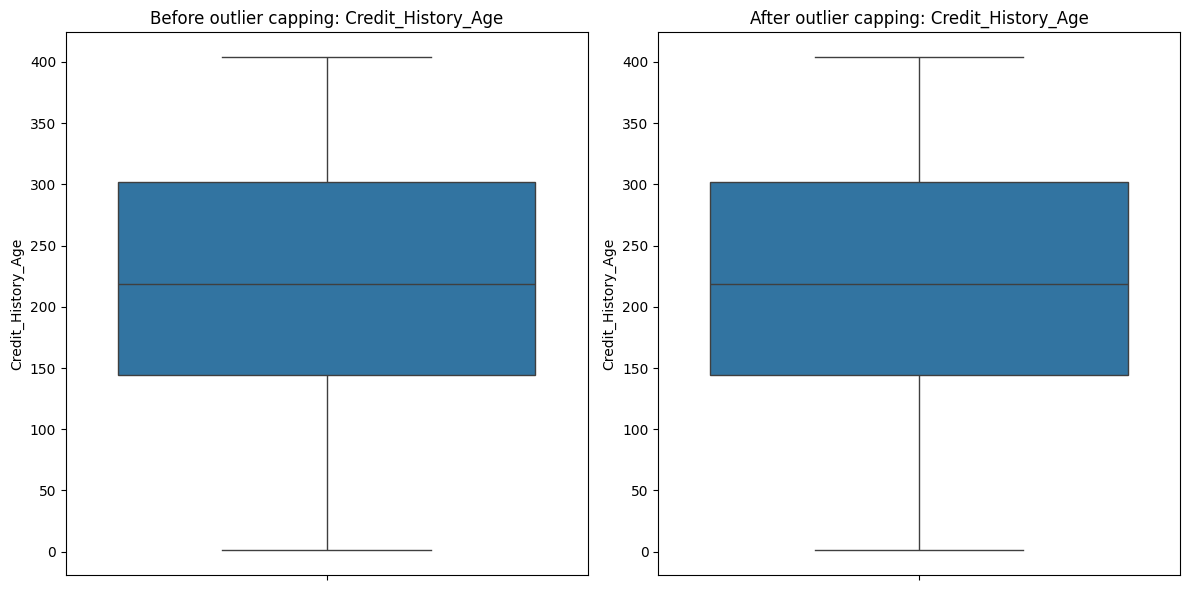

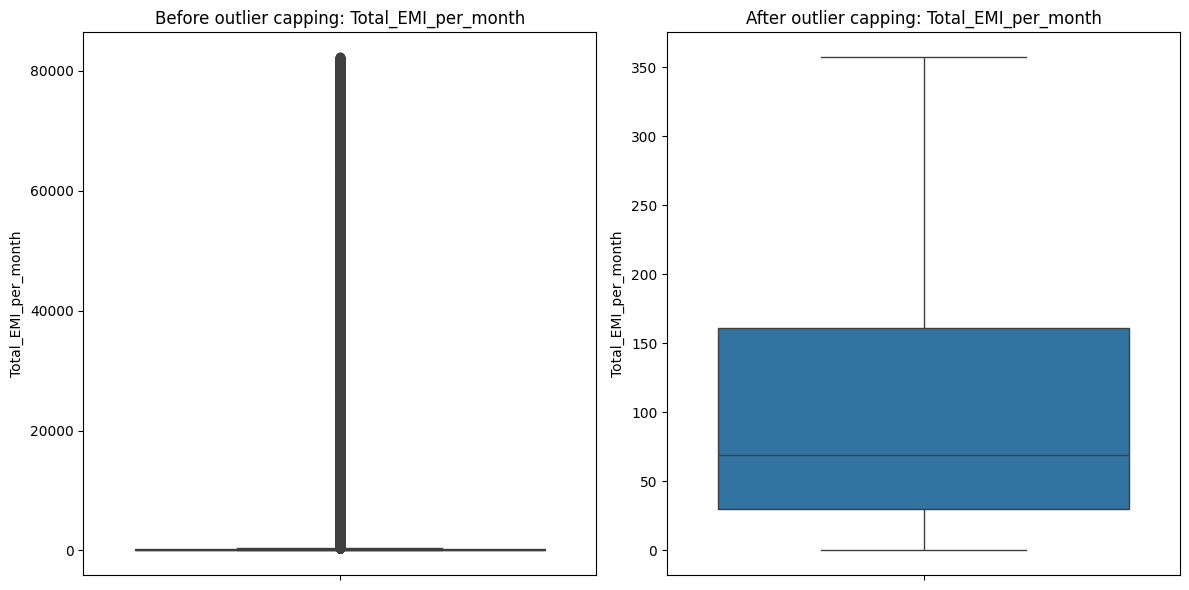

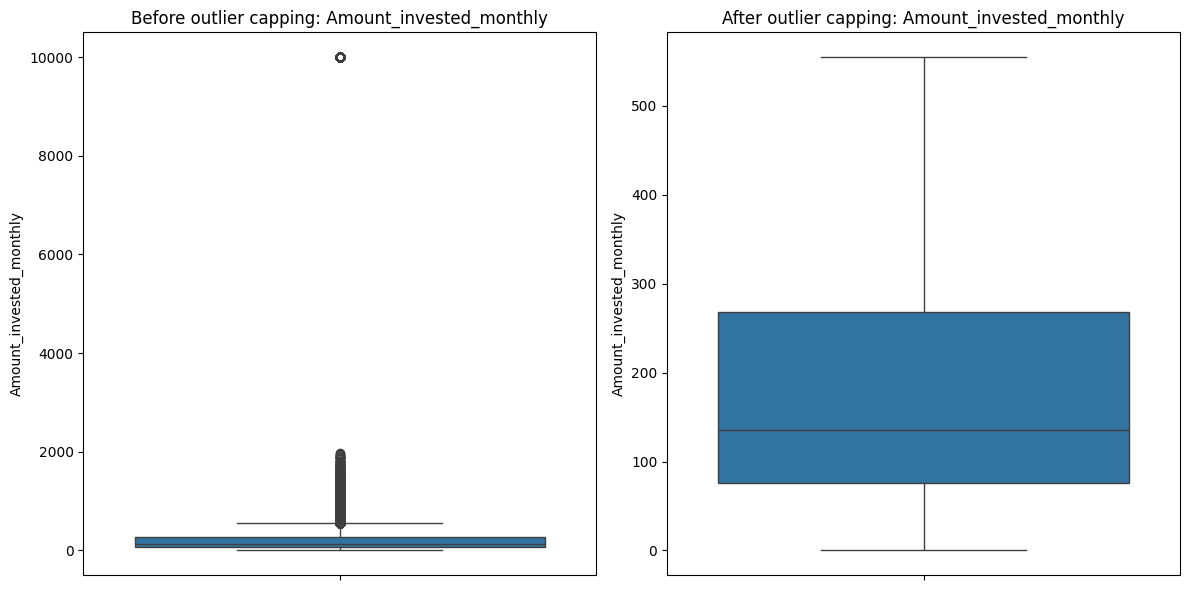

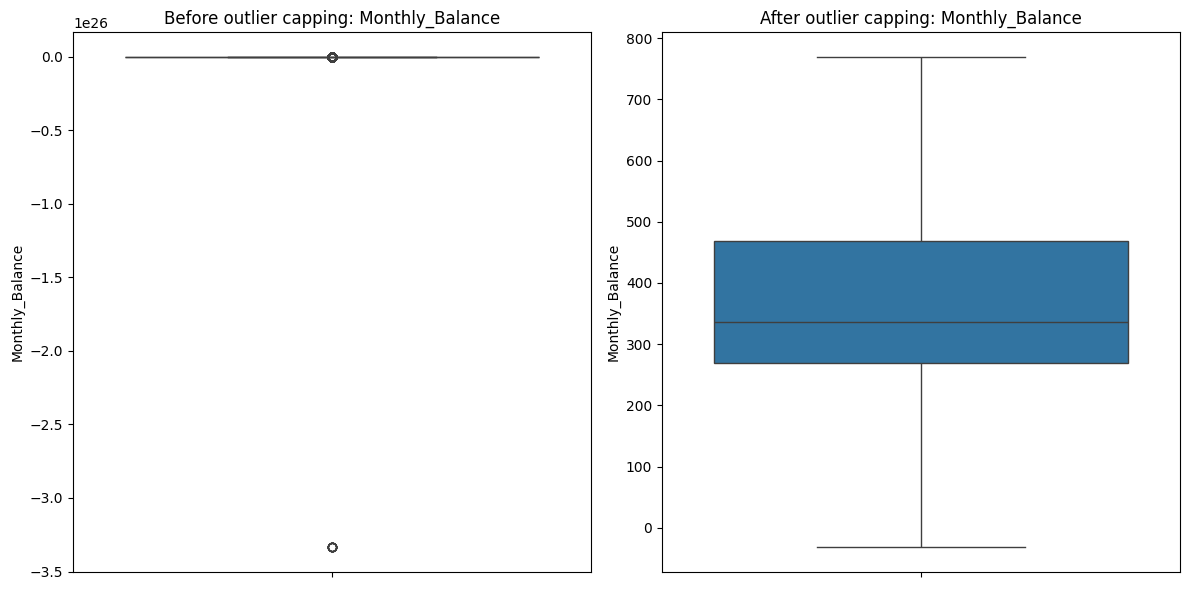

In [26]:
# running the function to compare the numerical columns before and after outlier capping
outlier_capping_comparison(data=df,data_processed=df_clean,outlier_indices=outliers)

In [27]:
df_clean['Month']=pd.to_datetime(df_clean.Month,format='%B').dt.month

In [28]:
categorical_cols=['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']
for column in categorical_cols:
    unique_values_count=len(df_clean[column].unique())
    print(f"Number of unique values in the '{column}' column:", unique_values_count)

Number of unique values in the 'Occupation' column: 16
Number of unique values in the 'Type_of_Loan' column: 6261
Number of unique values in the 'Credit_Mix' column: 4
Number of unique values in the 'Payment_of_Min_Amount' column: 3
Number of unique values in the 'Payment_Behaviour' column: 7


In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_clean['Type_of_Loan']=label_encoder.fit_transform(df_clean['Type_of_Loan'])

In [30]:
# finding the unique values 
print('Unique values in Payment_of_Min_Amount are: ', df_clean['Payment_of_Min_Amount'].unique())

Unique values in Payment_of_Min_Amount are:  ['No' 'NM' 'Yes']


In [31]:
# setting values
target_mapping = {'No':1,'NM':2,'Yes':3}
# mapping values
df_clean['Payment_of_Min_Amount']=df_clean['Payment_of_Min_Amount'].map(target_mapping)

In [32]:
# mentioning the categorical columns where one-hot encoding needs to be performed
columns_to_encode = ['Occupation','Credit_Mix','Payment_Behaviour']

In [33]:
# Creating dummy variables
df_dummy = pd.get_dummies(df_clean[columns_to_encode])

In [34]:
# Concatenating the dummy variables with the original dataframe
df_processed = pd.concat([df_clean,df_dummy],axis=1)

In [35]:
# Dropping the original categorical columns for which dummy variables were created for
df_processed.drop(columns_to_encode,axis=1,inplace=True)

In [36]:
# Encode the target variable
target_mapping = {'Poor':1 , 'Standard':2 , 'Good':3}
df_processed['Credit_Score'] = df_processed['Credit_Score'].map(target_mapping)

In [37]:
# Check if any string-based column is left in the data
df_processed.dtypes[df_processed.dtypes=='object']

ID             object
Customer_ID    object
Name           object
SSN            object
dtype: object

In [38]:
# Drop columns irrelevant to building a credit-scoring model
df_processed.drop(['ID','Customer_ID','SSN','Name'],axis=1,inplace=True)

In [39]:
# Importing key libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif

In [40]:
# Extracting the predictor variables
X = df_processed.drop('Credit_Score',axis=1)

In [41]:
# Extracting the target variable
y = df_processed['Credit_Score']

In [42]:
# Method 1: finding feature importance using Tree-Based method
rf_model=RandomForestClassifier()
rf_model.fit(X,y)
feature_importances=rf_model.feature_importances_
top_10_rf=X.columns[feature_importances.argsort()[-10:][::-1]]

In [43]:
# Method 2: Using Univariate Feature Selection
selector = SelectKBest(score_func=f_classif,k=10)
selector.fit(X,y)
top_10_univariate=X.columns[selector.get_support()]

In [44]:
print("Top 10 variables from Tree-Based Method:", ', '.join(top_10_rf))
print("------------------")
print("Top 10 variables from Univariate Feature Selection:", ', '.join(top_10_univariate))

Top 10 variables from Tree-Based Method: Outstanding_Debt, Interest_Rate, Credit_History_Age, Delay_from_due_date, Changed_Credit_Limit, Num_Credit_Inquiries, Num_of_Delayed_Payment, Monthly_Inhand_Salary, Credit_Utilization_Ratio, Num_Credit_Card
------------------
Top 10 variables from Univariate Feature Selection: Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Num_Credit_Inquiries, Outstanding_Debt, Credit_History_Age, Payment_of_Min_Amount, Credit_Mix_Good


In [45]:
imp_columns=list(set(top_10_rf.tolist()+top_10_univariate.tolist()))

In [46]:
print('Number of selected columns are: ', len(imp_columns))

Number of selected columns are:  13


In [47]:
# Extracting the selected independent features
X_selected=df_processed[imp_columns]
# Creating correlation matrix
correlation_matrix=X_selected.corr()
# Finding highly correlated feature pairs
highly_correlated_pairs=(correlation_matrix.abs()>0.7)&(correlation_matrix.abs()<1)
print("Highly correlated pairs of variables and their correlation values:\n")
checked_pairs = set() # to keep track of checked pairs
for col1 in X_selected.columns:
    for col2 in X_selected.columns:
        if col1 != col2 and (col1,col2) not in checked_pairs and (col2,col1) not in checked_pairs:
            if highly_correlated_pairs.loc[col1,col2]:
                correlation_value=correlation_matrix.loc[col1,col2]
                print(f"{col1}-{col2}: {correlation_value:.2f}")
                checked_pairs.add((col1,col2))
X_selected.dtypes

Highly correlated pairs of variables and their correlation values:



Num_Credit_Inquiries        float64
Num_Bank_Accounts           float64
Delay_from_due_date         float64
Num_Credit_Card             float64
Monthly_Inhand_Salary       float64
Payment_of_Min_Amount         int64
Credit_Utilization_Ratio    float64
Num_of_Delayed_Payment      float64
Credit_History_Age          float64
Outstanding_Debt            float64
Changed_Credit_Limit        float64
Credit_Mix_Good                bool
Interest_Rate               float64
dtype: object

In [48]:
# Columns to drop
columns_to_drop = ['Annual_Income', 'Credit_Mix_Good']
# Create a new DataFrame without the specified columns
X_selected = X_selected.drop(columns=[col for col in columns_to_drop if col in X_selected.columns])

# Verify the columns are dropped
print(X_selected.columns)

Index(['Num_Credit_Inquiries', 'Num_Bank_Accounts', 'Delay_from_due_date',
       'Num_Credit_Card', 'Monthly_Inhand_Salary', 'Payment_of_Min_Amount',
       'Credit_Utilization_Ratio', 'Num_of_Delayed_Payment',
       'Credit_History_Age', 'Outstanding_Debt', 'Changed_Credit_Limit',
       'Interest_Rate'],
      dtype='object')


In [49]:
# Importing library for calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculating VIF of the selected features
vif_df = pd.DataFrame()
vif_df["Variable"] = X_selected.columns
vif_df["VIF"]=[variance_inflation_factor(X_selected.values,i) for i in range(X_selected.shape[1])]
print("Variance Inflation Factors: ")
print(vif_df)

Variance Inflation Factors: 
                    Variable        VIF
0       Num_Credit_Inquiries   5.740127
1          Num_Bank_Accounts   9.004826
2        Delay_from_due_date   6.079047
3            Num_Credit_Card   9.920390
4      Monthly_Inhand_Salary   3.231710
5      Payment_of_Min_Amount  13.119399
6   Credit_Utilization_Ratio  22.620329
7     Num_of_Delayed_Payment   9.599193
8         Credit_History_Age   8.252992
9           Outstanding_Debt   6.368756
10      Changed_Credit_Limit   4.785504
11             Interest_Rate   7.360495


In [50]:
print('Number of selected columns are: ' , len(X_selected.columns))

Number of selected columns are:  12


In [51]:
final_X_cols=X_selected.columns.tolist()
print("Final selected predictors are: ", ','.join(final_X_cols))
df_final = df_processed[final_X_cols + ['Credit_Score']]

Final selected predictors are:  Num_Credit_Inquiries,Num_Bank_Accounts,Delay_from_due_date,Num_Credit_Card,Monthly_Inhand_Salary,Payment_of_Min_Amount,Credit_Utilization_Ratio,Num_of_Delayed_Payment,Credit_History_Age,Outstanding_Debt,Changed_Credit_Limit,Interest_Rate


In [52]:
# Splitting the predictors and targets
X = df_final.drop('Credit_Score',axis=1)
y = df_final['Credit_Score']
# Normalizing data using min-max scaler
from sklearn.preprocessing import MinMaxScaler
# Initializing min-max scaler
scaler = MinMaxScaler()
# Fitting it on the independent features
X = scaler.fit_transform(X)

In [53]:
y.value_counts()

Credit_Score
2    53174
1    28998
3    17828
Name: count, dtype: int64

In [54]:
# Importing SMOTE library
from imblearn.over_sampling import SMOTE
# Initalizing SMOTE
smote=SMOTE()
# Fitting SMOTE to the data
X_bal,y_bal = smote.fit_resample(X,y)
y_bal.value_counts()


Credit_Score
3    53174
2    53174
1    53174
Name: count, dtype: int64

In [56]:
# Importing required library
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X_bal,y_bal,test_size=0.3,random_state=123,stratify=y_bal)
# finding number of rows and columns of the train and test dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(111665, 12)
(47857, 12)
(111665,)
(47857,)


In [57]:
# Importing classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [58]:
# Creating a list of classifiers
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('kNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussian NB', GaussianNB())
]
# importing model evaluation libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [59]:
# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('--------------')

Classifier: Decision Tree
Average Accuracy: 0.7787
Average Precision: 0.7788
Average Recall: 0.7795
--------------
Classifier: Random Forest
Average Accuracy: 0.8576
Average Precision: 0.8569
Average Recall: 0.8572
--------------
Classifier: kNN
Average Accuracy: 0.7963
Average Precision: 0.7982
Average Recall: 0.7963
--------------
Classifier: Gaussian NB
Average Accuracy: 0.6583
Average Precision: 0.6627
Average Recall: 0.6583
--------------


In [60]:
# Initializing and fitting the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state = 42).fit(X_train, y_train)

In [61]:
# Making predictions on the test dataset
y_test_pred = rf_classifier.predict(X_test)

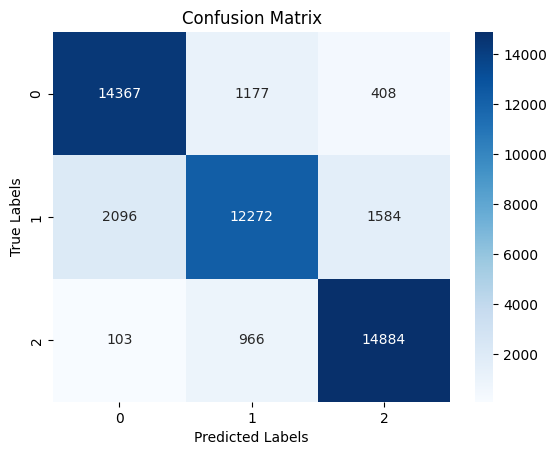

In [62]:
# Evaluating model through a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.0f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [63]:
print("Classification Report")
print(classification_report(y_test, y_test_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.87      0.90      0.88     15952
           2       0.85      0.77      0.81     15952
           3       0.88      0.93      0.91     15953

    accuracy                           0.87     47857
   macro avg       0.87      0.87      0.87     47857
weighted avg       0.87      0.87      0.87     47857



In [145]:
# Importing data where credit scoring needs to be done for new loan applicants
test_df = pd.read_csv('test.csv')

In [155]:
# Creating a copy of the serving data
df_new = test_df.copy()

In [156]:
# Columns in the new dataset
df_new.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [74]:
df_new.head()

ID Customer_ID      Month             Name  Age          SSN  \
0  0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1  0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2  0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3  0x160d   CUS_0xd40   December    Aaron Maashoh  24_  821-00-0265   
4  0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12            1824.843333                  3  ...   
2  Scientist      19114.12            1824.843333                  3  ...   
3  Scientist      19114.12                    NaN                  3  ...   
4    _______      34847.84            3037.986667                  2  ...   

   Num_Credit_Inquiries  Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0                2022.0        Good           809.98                35.030402   
1                   4.0        Good           809.98                33.053114   
2                   4.0        Good           809.98                33.811894   
3                   4.0        Good           809.98                32.430559   
4                   5.0        Good           605.03                25.926822   

       Credit_History_Age Payment_of_Min_Amount Total_EMI_per_month  \
0   22 Years and 9 Months                    No           49.574949   
1  22 Years and 10 Months                    No           49.574949   
2                     NaN                    No           49.574949   
3   23 Years and 0 Months                    No           49.574949   
4   27 Years and 3 Months                    No           18.816215   

   Amount_invested_monthly                 Payment_Behaviour  \
0       236.64268203272135    Low_spent_Small_value_payments   
1       21.465380264657146  High_spent_Medium_value_payments   
2       148.23393788500925   Low_spent_Medium_value_payments   
3        39.08251089460281  High_spent_Medium_value_payments   
4       39.684018417945296   High_spent_Large_value_payments   

      Monthly_Balance  
0  186.26670208571772  
1  361.44400385378196  
2  264.67544623342997  
3  343.82687322383634  
4   485.2984336755923  

[5 rows x 27 columns]

In [76]:
print("The number of rows are {} and the number of columns are {}".format(df_new.shape[0],df_new.shape[1]))

The number of rows are 50000 and the number of columns are 27


In [77]:
# Finding the data types and number of non-null values in the data
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [78]:
df_new.describe(exclude=np.number).T

count unique                               top   freq
ID                       50000  50000                            0x160a      1
Customer_ID              50000  12500                         CUS_0xd40      4
Month                    50000      4                         September  12500
Name                     44985  10139                            Stevex     22
Age                      50000    976                                39   1493
SSN                      50000  12501                         #F%$D@*&8   2828
Occupation               50000     16                           _______   3438
Annual_Income            50000  16121                         109945.32      8
Num_of_Loan              50000    263                                 2   7173
Type_of_Loan             44296   6260                     Not Specified    704
Num_of_Delayed_Payment   46502    443                                19   2622
Changed_Credit_Limit     50000   3927                                 _   1059
Credit_Mix               50000      4                          Standard  18379
Outstanding_Debt         50000  12685                           1109.03     12
Credit_History_Age       45530    399             20 Years and 1 Months    254
Payment_of_Min_Amount    50000      3                               Yes  26158
Amount_invested_monthly  47729  45450                         __10000__   2175
Payment_Behaviour        50000      7    Low_spent_Small_value_payments  12694
Monthly_Balance          49438  49433  __-333333333333333333333333333__      6

In [79]:
df_new.Month.value_counts()

Month
September    12500
October      12500
November     12500
December     12500
Name: count, dtype: int64

In [165]:
# performing MVI on the categorical columns
print("Column: Name")
preprocess_data(data=df_new, column='Name', mvi_groupby='Customer_ID')
print("Column: Type_of_Loan")
preprocess_data(data=df_new,column='Type_of_Loan', mvi_customval='Not specified')
# performing MVI on numerical columns
print("Column: Monthly_Inhand_Salary")
preprocess_data(data=df_new,column='Monthly_Inhand_Salary',mvi_groupby='Customer_ID')
print("Column:Num_Credit_Inquiries")
preprocess_data(data=df_new,column='Num_Credit_Inquiries',mvi_groupby='Customer_ID')
# stripping unwanted values, performing MVI and typecasting
print("Column: Age")
preprocess_data(data=df_new,column='Age',unwanted_value_strip='_',mvi_groupby='Customer_ID',datatype='int')
print("Column: Annual_Income")
preprocess_data(data=df_new,column='Annual_Income',unwanted_value_strip='_',mvi_groupby='Customer_ID',datatype='float')
print("Column: Outstanding_Debt")
preprocess_data(data=df_new,column='Outstanding_Debt',unwanted_value_strip='_',mvi_groupby='Customer_ID',datatype='float')
print("Column: Amount_invested_monthly")
preprocess_data(data=df_new,column='Amount_invested_monthly',unwanted_value_strip='_',mvi_groupby='Customer_ID',datatype='float')
print("Column: Num_of_Loan")
preprocess_data(data=df_new,column='Num_of_Loan',unwanted_value_strip='_',mvi_groupby='Customer_ID',datatype='int')
print("Column: Num_of_Delayed_Payment")
preprocess_data(data=df_new,column='Num_of_Delayed_Payment',unwanted_value_strip='_',mvi_groupby='Customer_ID',datatype='float')
# replacing unwanted values to NaN, performing MVI and typecasting
print("Column: Changed_Credit_Limit")
preprocess_data(data=df_new,column='Changed_Credit_Limit',unwanted_value_strip='_',unwanted_value_replace='',mvi_groupby='Customer_ID',datatype='float')
print("Column: Monthly_Balance")
preprocess_data(data=df_new,column='Monthly_Balance',unwanted_value_strip='_',unwanted_value_replace='__-333333333333333333333333333__',mvi_groupby='Customer_ID',datatype='float')

Column: Name
Initial data for column 'Name':
 0      Aaron Maashoh
1      Aaron Maashoh
2      Aaron Maashoh
3      Aaron Maashoh
4    Rick Rothackerj
Name: Name, dtype: object


C:\Users\Nuno\AppData\Local\Temp\ipykernel_6516\2644930012.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.fillna(mode[0] if not mode.empty else 0)



After MVI, column 'Name':
 0      Aaron Maashoh
1      Aaron Maashoh
2      Aaron Maashoh
3      Aaron Maashoh
4    Rick Rothackerj
Name: Name, dtype: object
--------------------------------------------------
Column: Type_of_Loan
Initial data for column 'Type_of_Loan':
 0    Auto Loan, Credit-Builder Loan, Personal Loan,...
1    Auto Loan, Credit-Builder Loan, Personal Loan,...
2    Auto Loan, Credit-Builder Loan, Personal Loan,...
3    Auto Loan, Credit-Builder Loan, Personal Loan,...
4                                  Credit-Builder Loan
Name: Type_of_Loan, dtype: object

Missing values are replaced with 'Not specified'
            ID Customer_ID      Month             Name   Age          SSN  \
0       0x160a   CUS_0xd40  September    Aaron Maashoh    23  821-00-0265   
1       0x160b   CUS_0xd40    October    Aaron Maashoh    24  821-00-0265   
2       0x160c   CUS_0xd40   November    Aaron Maashoh    24  821-00-0265   
3       0x160d   CUS_0xd40   December    Aaron Maashoh    24 

In [167]:
#df_new['Credit_History_Age']=df_new['Credit_History_Age'].apply(lambda x:credit_history_in_months(x)).astype(float)
print('Column: Credit_History_Age')
preprocess_data(data=df_new,column='Credit_History_Age', mvi_groupby='Customer_ID')

Column: Credit_History_Age
Initial data for column 'Credit_History_Age':
 0    273.0
1    274.0
2    273.0
3    276.0
4    327.0
Name: Credit_History_Age, dtype: float64

After MVI, column 'Credit_History_Age':
 0    273.0
1    274.0
2    273.0
3    276.0
4    327.0
Name: Credit_History_Age, dtype: float64
--------------------------------------------------


In [169]:
df_new = df_new[final_X_cols]

In [141]:
df_new.columns

Index(['Num_Credit_Inquiries', 'Num_Bank_Accounts', 'Delay_from_due_date',
       'Num_Credit_Card', 'Monthly_Inhand_Salary', 'Payment_of_Min_Amount',
       'Credit_Utilization_Ratio', 'Num_of_Delayed_Payment',
       'Credit_History_Age', 'Outstanding_Debt', 'Changed_Credit_Limit',
       'Interest_Rate'],
      dtype='object')

In [170]:
df_new.isna().sum()

Num_Credit_Inquiries        0
Num_Bank_Accounts           0
Delay_from_due_date         0
Num_Credit_Card             0
Monthly_Inhand_Salary       0
Payment_of_Min_Amount       0
Credit_Utilization_Ratio    0
Num_of_Delayed_Payment      0
Credit_History_Age          0
Outstanding_Debt            0
Changed_Credit_Limit        0
Interest_Rate               0
dtype: int64

In [174]:
df_new.dtypes

Num_Credit_Inquiries        float64
Num_Bank_Accounts             int64
Delay_from_due_date           int64
Num_Credit_Card               int64
Monthly_Inhand_Salary       float64
Payment_of_Min_Amount         int64
Credit_Utilization_Ratio    float64
Num_of_Delayed_Payment      float64
Credit_History_Age          float64
Outstanding_Debt            float64
Changed_Credit_Limit        float64
Interest_Rate                 int64
dtype: object

In [173]:
# Encode Payment_of_Min_Amount as it is a non integer column
target_mapping = {'No': 1, 'NM': 2, 'Yes': 3}
df_new['Payment_of_Min_Amount']=df_new['Payment_of_Min_Amount'].map(target_mapping)

In [176]:
# Making predictions using the model 
predictions = rf_classifier.predict(df_new)
# Appending the predictions to the original dataset
test_df['Credit_Score'] = pd.Series(predictions)
# Viewing the final dataset with predictions
test_df

C:\Users\Nuno\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ID Customer_ID      Month             Name   Age          SSN  \
0       0x160a   CUS_0xd40  September    Aaron Maashoh    23  821-00-0265   
1       0x160b   CUS_0xd40    October    Aaron Maashoh    24  821-00-0265   
2       0x160c   CUS_0xd40   November    Aaron Maashoh    24  821-00-0265   
3       0x160d   CUS_0xd40   December    Aaron Maashoh   24_  821-00-0265   
4       0x1616  CUS_0x21b1  September  Rick Rothackerj    28  004-07-5839   
...        ...         ...        ...              ...   ...          ...   
49995  0x25fe5  CUS_0x8600   December   Sarah McBridec  4975  031-35-0942   
49996  0x25fee  CUS_0x942c  September            Nicks    25  078-73-5990   
49997  0x25fef  CUS_0x942c    October            Nicks    25  078-73-5990   
49998  0x25ff0  CUS_0x942c   November            Nicks    25  078-73-5990   
49999  0x25ff1  CUS_0x942c   December            Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12            1824.843333                  3  ...   
2      Scientist      19114.12            1824.843333                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4        _______      34847.84            3037.986667                  2  ...   
...          ...           ...                    ...                ...  ...   
49995  Architect      20002.88            1929.906667                 10  ...   
49996   Mechanic      39628.99                    NaN                  4  ...   
49997   Mechanic      39628.99            3359.415833                  4  ...   
49998   Mechanic      39628.99                    NaN                  4  ...   
49999   Mechanic      39628.99            3359.415833                  4  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0            Good            809.98                35.030402   
1            Good            809.98                33.053114   
2            Good            809.98                33.811894   
3            Good            809.98                32.430559   
4            Good            605.03                25.926822   
...           ...               ...                      ...   
49995           _            3571.7                34.780553   
49996        Good            502.38                27.758522   
49997        Good            502.38                36.858542   
49998        Good            502.38                39.139840   
49999           _            502.38                34.108530   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 9 Months                     No           49.574949   
1      22 Years and 10 Months                     No           49.574949   
2                         NaN                     No           49.574949   
3       23 Years and 0 Months                     No           49.574949   
4       27 Years and 3 Months                     No           18.816215   
...                       ...                    ...                 ...   
49995                     NaN                    Yes           60.964772   
49996  31 Years and 11 Months                     NM           35.104023   
49997   32 Years and 0 Months                     No           35.104023   
49998   32 Years and 1 Months                     No           35.104023   
49999   32 Years and 2 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0          236.64268203272135    Low_spent_Small_value_payments   
1          21.465380264657146  High_spent_Medium_value_payments   
2          148.23393788500925   Low_spent_Medium_value_payments   
3           39.08251089460281  High_spent_Medium_value_payments   
4          39.684018417945296   High_spent_Large_value_payments   
...                       ... 